In [2]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import LabelEncoder, StandardScaler  
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("Dataset .csv")
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   float64
 1   Restaurant Name       9551 non-null   float64
 2   Country Code          9551 non-null   float64
 3   City                  9551 non-null   float64
 4   Address               9551 non-null   float64
 5   Locality              9551 non-null   float64
 6   Locality Verbose      9551 non-null   float64
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   float64
 10  Average Cost for two  9551 non-null   float64
 11  Currency              9551 non-null   float64
 12  Has Table booking     9551 non-null   float64
 13  Has Online delivery   9551 non-null   float64
 14  Is delivering now     9551 non-null   float64
 15  Switch to order menu 

### Data Preprocessing

In [4]:
print("Missing values per column:")
print(data.isnull().sum()) 

Missing values per column:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [5]:
categorical_features = data.columns[data.dtypes == 'object'].tolist()
encoder = LabelEncoder()
for col in categorical_features:
  data[col] = encoder.fit_transform(data[col])

In [6]:
scaler = StandardScaler()
numerical_features = [col for col in data.columns if data[col].dtypes != 'object']
data[numerical_features] = scaler.fit_transform(data[numerical_features])



In [7]:
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,-0.310940,0.044295,2.531111,-0.228533,1.614667,-1.542277,-1.523332,1.372269,-1.025581,-0.135907,...,-4.351046,2.692181,-0.587547,-0.059771,0.0,1.319803,1.407131,-1.977859,-0.465442,0.365202
1,-0.312458,-0.224498,2.531111,-0.228533,0.589558,-0.206201,-0.230036,1.371945,-1.026647,0.235186,...,-4.351046,2.692181,-0.587547,-0.059771,0.0,1.319803,1.209281,-1.977859,-0.465442,1.009168
2,-0.312946,-0.353294,2.531111,-0.142317,0.055177,-1.108527,-1.095248,1.372975,-1.024131,1.323205,...,-4.351046,2.692181,-0.587547,-0.059771,0.0,2.424090,1.143331,-1.308053,1.895070,0.262911
3,-0.310841,0.491817,2.531111,-0.142317,1.616615,0.645468,0.595986,1.372966,-1.023775,0.264329,...,-4.351046,-0.371446,-0.587547,-0.059771,0.0,2.424090,1.473081,-1.977859,-0.465442,0.483766
4,-0.311319,0.872607,2.531111,-0.142317,1.616226,0.645468,0.595986,1.372991,-1.023854,0.256557,...,-4.351046,2.692181,-0.587547,-0.059771,0.0,2.424090,1.407131,-1.977859,-0.465442,0.167595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,-0.356658,0.368620,3.341718,2.659685,0.539277,-0.446821,-0.465180,-0.847685,1.378025,1.599096,...,7.681415,-0.371446,-0.587547,-0.059771,0.0,1.319803,0.945480,-1.308053,1.895070,1.467151
9547,-0.357452,-1.093408,3.341718,2.659685,0.553309,-0.336009,-0.359667,-0.846144,1.376849,1.620468,...,7.681415,-0.371446,-0.587547,-0.059771,0.0,1.319803,1.011430,-1.308053,1.895070,2.039049
9548,-0.356649,-0.273030,3.341718,2.659685,0.554868,-0.329677,-0.350623,-0.846305,1.381025,0.233243,...,7.681415,-0.371446,-0.587547,-0.059771,0.0,2.424090,0.681680,1.371170,0.124686,1.171903
9549,-0.356614,-1.465798,3.341718,2.659685,0.555258,-0.329677,-0.350623,-0.846272,1.381221,1.296005,...,7.681415,-0.371446,-0.587547,-0.059771,0.0,2.424090,0.879530,-1.308053,1.895070,1.729853


##### Splitting data into training and testing sets


In [8]:
X = data.drop('Aggregate rating', axis=1)  # Assuming 'rating' is the target variable
y = data['Aggregate rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model selection and training

In [9]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

LinearRegression()

In [10]:
model_svr = SVR()
model_svr.fit(X_train, y_train)

SVR()

### Model Evaluation

In [11]:
y_pred_linear = model_linear.predict(X_test)
y_pred_svr = model_svr.predict(X_test)

In [12]:
# Calculate MSE and R-squared for linear regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

In [13]:
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

In [14]:
# Print the results
print("Linear Regression:")
print("  Mean Squared Error:", mse_linear)
print("  R-squared:", r2_linear)


Linear Regression:
  Mean Squared Error: 0.5301187649389666
  R-squared: 0.4645125017763102


In [15]:
print("Support Vector Regression:")
print("  Mean Squared Error:", mse_svr)
print("  R-squared:", r2_svr)

Support Vector Regression:
  Mean Squared Error: 0.05520481476767409
  R-squared: 0.9442361031055985


### Accessing feature importance 

In [16]:
results = permutation_importance(model_svr, X_test, y_test, scoring='neg_mean_squared_error')

print(type(results))

if hasattr(results, 'get_feature_importances'):
  feature_importances = results.get_feature_importances(normalized=True)
elif isinstance(results, dict):  
  feature_importances = results['importances_mean'] 
else:
  print("Feature importance access method not found for this return type.")


<class 'sklearn.utils._bunch.Bunch'>


In [17]:
feature_names = X_train.columns

In [18]:
# Prints the feature names and importance scores (sort by importance scores)
sorted_features = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)
print("Feature Importance (SVR - Permutation Importance):")
for feature, importance in sorted_features:
  print(f"  {feature}: {importance:.4f}") 


Feature Importance (SVR - Permutation Importance):
  Rating text: 1.7841
  Rating color: 1.1834
  Votes: 0.0609
  Has Online delivery: 0.0452
  Country Code: 0.0352
  Currency: 0.0267
  Restaurant ID: 0.0192
  Price range: 0.0176
  Longitude: 0.0176
  Latitude: 0.0143
  Locality Verbose: 0.0116
  City: 0.0100
  Locality: 0.0097
  Has Table booking: 0.0091
  Average Cost for two: 0.0060
  Is delivering now: 0.0028
  Cuisines: 0.0012
  Address: 0.0011
  Restaurant Name: 0.0000
  Switch to order menu: 0.0000


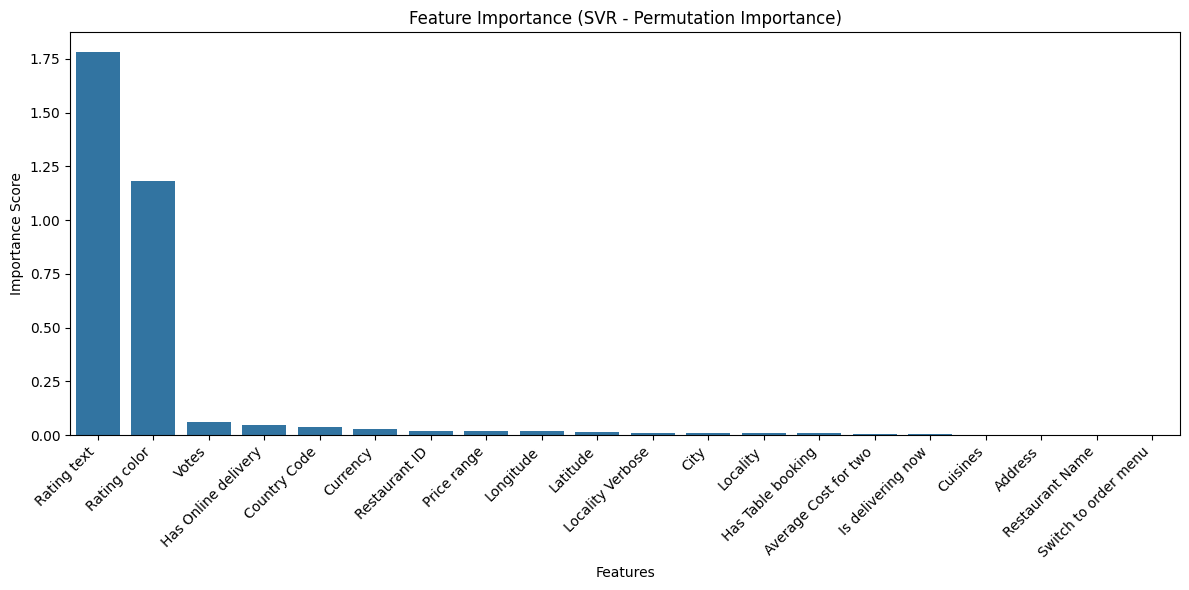

In [19]:
features = [f[0] for f in sorted_features]  # Feature names
importances = [f[1] for f in sorted_features]  # Importance scores

# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x=features, y=importances)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance (SVR - Permutation Importance)")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability if many features
plt.tight_layout()
plt.show()
